In [1]:
import numpy as np
import ssid
import quakeio
from ssid import modal, spec
from ssid.utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "../CESMD/CE58658/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

with open('../../Caltrans.Hayward/CGS_data/function_test_zips.txt', 'r') as readfile:
    function_tests = readfile.read().split("\n")
import glob
events = [quakeio.read(event) for event in glob.glob('../CGS_data/58658*P.zip') if event[-33:] not in function_tests]

from pathlib import Path
# for file in Path(directory).glob(pattern):
#     if str(file)[-33:] in function_tests:
#         print(file)
files = [file for file in Path(directory).glob(pattern) if str(file)[-33:] not in function_tests]

In [3]:
data_conf = Config()

# # PAINTER RIO DELL TRANSVERSE (CASE 1)
# data_conf.inputs  = [17,3,20]
# data_conf.outputs = [9,7,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# HAYWARD TRANSVERSE (CASE 1)
title = "Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)"
data_conf.inputs  = [25,2,7,18]
data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL (CASE 2)
# title = "Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)"
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]
# # HAYWARD LONGITUDINAL Alternative
# title = "Hayward Bridge Longitudinal Mode (In: Ch6, Out: Ch14)"
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`d`  | decimation (downsampling) factor
`r`, `order` | model order (2 times number of DOF)

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`no`, `horizon` | number of observability parameters, or prediction horizon
`nc` | number of controllability parameters

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`no`, `horizon` | number of steps used for identification, or prediction horizon

### Parameters for Mode Validation
parameter | value
----------|-------
`outlook` | number of steps used for temporal consistency in EMAC

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.horizon = 190
conf.nc = 190
conf.order  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.2,1.6)
conf.damping = 0.06
conf.pseudo = True
conf.outlook = 190

../CESMD/CE58658/58658_002_20210623_17.15.07.P.zip


peak acceleration (cm/s/s): 908.091


100%|█████████▉| 1685/1686 [00:01<00:00, 1201.29it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.64       0.724      1.866e-05  0.8857     1.652e-05
      0.7857     -0.002558  1.0        0.8943     0.8943   
      0.6507     0.02906    1.0        0.9749     0.9749   
      0.5979     -0.003875  1.0        0.6618     0.6618   
      0.4821     0.03453    1.0        0.9936     0.9936   
      0.4123     -0.0008963  1.0        0.2438     0.2438   
Mean Period(s): 0.7614005483142967
Standard Dev(s): 0.41044068360757624
../CESMD/CE58658/58658_003_20211002_12.22.00.P.zip
peak acceleration (cm/s/s): 872.494


100%|█████████▉| 1685/1686 [00:01<00:00, 1360.40it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.926      0.002467   1.0        0.984      0.984    
      0.7144     -0.006375  1.0        0.9847     0.9847   
      0.6562     0.004495   1.0        0.3032     0.3032   
      0.6021     -5.75e-05  1.0        0.9696     0.9696   
      0.4206     0.007939   1.0        0.9515     0.9515   
      0.2218     0.01868    1.0        0.996      0.996    
Mean Period(s): 0.590184381908589
Standard Dev(s): 0.22254341334230934
../CESMD/CE58658/58658_004_20210723_08.59.25.P.zip
peak acceleration (cm/s/s): -847.931


100%|█████████▉| 1148/1149 [00:00<00:00, 1564.09it/s]
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:85: RuntimeWarning: divide by zero encountered in scalar divide
  nu[i]    = (s22[i]-s11[i])/(2*s12[i])
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:86: RuntimeWarning: invalid value encountered in scalar multiply
  lam[0,i] = (s11[i]+s22[i])/2 + s12[i]*np.sqrt(nu[i]**2+1)
/mnt/c/Users/cmp/Documents/GitHub/SystemIdentification/src/ssid/validation.py:87: RuntimeWarning: invalid value encountered in scalar multiply
  lam[1,i] = (s11[i]+s22[i])/2 - s12[i]*np.sqrt(nu[i]**2+1)


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.551      0.1476     1.0        0.9627     0.9627   
      0.651      0.03       1.0        0.668      0.668    
      0.557      -0.01329   1.0        0.3558     0.3558   
      0.4902     -0.0036    1.0        0.766      0.766    
      0.1908     0.002647   1.0        0.9973     0.9973   
Mean Period(s): 0.687894999401802
Standard Dev(s): 0.4580033168339698
../CESMD/CE58658/58658_004_20230401_09.43.22.P.zip
peak acceleration (cm/s/s): 20.777


100%|█████████▉| 1335/1336 [00:00<00:00, 1407.37it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.138      0.1526     1.0        0.9832     0.9832   
      0.2436     0.00278    1.0        0.979      0.979    
      0.09876    0.01167    1.0        0.9332     0.9332   
      0.09719    0.009034   1.0        0.6902     0.6902   
      0.08545    0.00119    1.0        0.905      0.905    
Mean Period(s): 0.33266268660635817
Standard Dev(s): 0.4069938266836494
../CESMD/CE58658/58658_004_20230401_09.43.22.R.zip
peak acceleration (cm/s/s): -0.033297


100%|█████████▉| 1335/1336 [00:00<00:00, 1397.42it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3426     0.004658   1.0        0.7571     0.7571   
      0.2178     0.00328    1.0        0.9422     0.9422   
      0.2039     0.6601     3.828e-56  0.9989     3.823e-56
      0.1354     0.004108   1.0        0.979      0.979    
      0.08561    0.003943   1.0        0.9148     0.9148   
      0.08475    0.002529   1.0        0.9773     0.9773   
Mean Period(s): 0.178343662239942
Standard Dev(s): 0.08981435751785331
../CESMD/CE58658/58658_005_20210803_12.52.01.P.zip
peak acceleration (cm/s/s): 1369.537


100%|█████████▉| 1473/1474 [00:01<00:00, 1238.75it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      2.222      0.02938    1.0        0.9917     0.9917   
      1.632      0.3146     1.0        0.9256     0.9256   
      0.7922     0.01168    1.0        0.8861     0.8861   
      0.7182     0.0003013  1.0        0.8515     0.8515   
      0.6515     -0.006383  1.0        0.7279     0.7279   
      0.4192     0.002855   1.0        0.9562     0.9562   
Mean Period(s): 1.0725866855991881
Standard Dev(s): 0.6380486662610428
../CESMD/CE58658/58658_005_20211007_11.51.59.P.zip
peak acceleration (cm/s/s): -69.642


100%|█████████▉| 1435/1436 [00:01<00:00, 1288.31it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.8889     0.0998     1.0        0.7076     0.7076   
      0.3893     0.02661    1.0        0.849      0.849    
      0.3253     0.1293     1.0        0.9203     0.9203   
      0.1717     0.002809   1.0        0.9425     0.9425   
      0.09435    -0.00518   1.0        0.8483     0.8483   
      0.08273    0.08562    2.172e-08  0.8371     1.818e-08
Mean Period(s): 0.32538981911374343
Standard Dev(s): 0.2761232532007062
../CESMD/CE58658/58658_007_20210426_10.09.54.P.zip
peak acceleration (cm/s/s): 56.486


100%|█████████▉| 1435/1436 [00:00<00:00, 1579.57it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.6444     0.02751    1.0        0.8518     0.8518   
      0.4189     3.334e-05  1.0        0.5442     0.5442   
      0.09395    -0.00191   1.0        0.9739     0.9739   
      0.09071    0.004271   1.0        0.9707     0.9707   
      0.08871    0.003745   1.0        0.924      0.924    
      0.08463    0.004941   1.0        0.9751     0.9751   
Mean Period(s): 0.2368787088664244
Standard Dev(s): 0.21837002181997564
../CESMD/CE58658/58658_014_20220215_12.01.04.P.zip
peak acceleration (cm/s/s): 35.168


100%|█████████▉| 1335/1336 [00:00<00:00, 1434.41it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      4.792      0.08596    1.0        0.9965     0.9965   
      0.1109     0.003182   1.0        0.9627     0.9627   
      0.104      0.006174   1.0        0.896      0.896    
      0.1038     0.02626    1.0        0.9613     0.9613   
      0.08747    0.0004779  1.0        0.6894     0.6894   
      0.08496    0.007874   1.0        0.9887     0.9887   
Mean Period(s): 0.8804567009493608
Standard Dev(s): 1.749108162060696
../CESMD/CE58658/berkeley_04jan2018_72948801_ce58658p.zip
peak acceleration (cm/s/s): 39.371


100%|█████████▉| 1385/1386 [00:01<00:00, 1302.57it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.094      0.002945   1.0        0.9979     0.9979   
      0.8148     0.005393   1.0        0.9806     0.9806   
      0.6051     0.04245    1.0        0.4734     0.4734   
      0.3792     0.03203    1.0        0.756      0.756    
      0.2919     0.0996     1.0        0.158      0.158    
      0.2283     0.01832    1.0        0.9941     0.9941   
Mean Period(s): 0.5688467945890036
Standard Dev(s): 0.3071316117209296
../CESMD/CE58658/nc73654060_ce58658p.zip
peak acceleration (cm/s/s): 33.381


100%|█████████▉| 1435/1436 [00:01<00:00, 1294.88it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      1.071      0.03818    1.0        0.9543     0.9543   
      0.796      0.01017    1.0        0.996      0.996    
      0.4132     0.04062    1.0        0.8562     0.8562   
      0.2921     0.03255    1.0        0.7922     0.7922   
      0.2634     0.01762    1.0        0.9957     0.9957   
      0.2277     0.01779    1.0        0.9128     0.9128   
Mean Period(s): 0.5105454521823097
Standard Dev(s): 0.31455558510422027
../CESMD/CE58658/nc73689506_ce58658p.zip
peak acceleration (cm/s/s): 19.968


100%|█████████▉| 1335/1336 [00:00<00:00, 1539.73it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.2446     0.02391    1.0        0.9774     0.9774   
      0.2269     0.03219    1.0        0.9773     0.9773   
      0.1053     0.008735   1.0        0.8243     0.8243   
      0.09731    0.1775     8.467e-23  0.9157     7.753e-23
      0.0969     0.000572   1.0        0.9538     0.9538   
      0.09477    0.009017   1.0        0.3635     0.3635   
Mean Period(s): 0.14430644526054767
Standard Dev(s): 0.06494824533672212
../CESMD/CE58658/nc73691736_ce58658p.zip
peak acceleration (cm/s/s): -15.355


100%|█████████▉| 1335/1336 [00:01<00:00, 882.51it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.5252     0.009808   1.0        0.9849     0.9849   
      0.198      0.008125   1.0        0.8715     0.8715   
      0.174      0.00379    1.0        0.6004     0.6004   
      0.1661     0.01197    1.0        0.6883     0.6883   
      0.0835     0.001709   1.0        0.9839     0.9839   
      0.08211    0.003945   1.0        0.9513     0.9513   
Mean Period(s): 0.20483594819768877
Standard Dev(s): 0.14994864483166032
../CESMD/CE58658/nc73865505_ce58658p.zip
peak acceleration (cm/s/s): 2.943
No channels found
../CESMD/CE58658/sanlorenzo_28june2021.zip
peak acceleration (cm/s/s): 126.113


100%|█████████▉| 660/661 [00:00<00:00, 1927.66it/s]


p=4,n=12
Spectral quantities:
       T(s)        ζ        EMACO        MPC     EMACO*MPC
      0.3524     0.9943     0.0        0.4386     0.0      
      0.2526     0.2316     1.0        0.9801     0.9801   
      0.2419     0.5222     0.0        0.2521     0.0      
      0.2026     0.9782     0.0        0.6725     0.0      
Mean Period(s): 0.2623737022342967
Standard Dev(s): 0.05521135487068783


Text(0.5, 0.98, 'Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)')

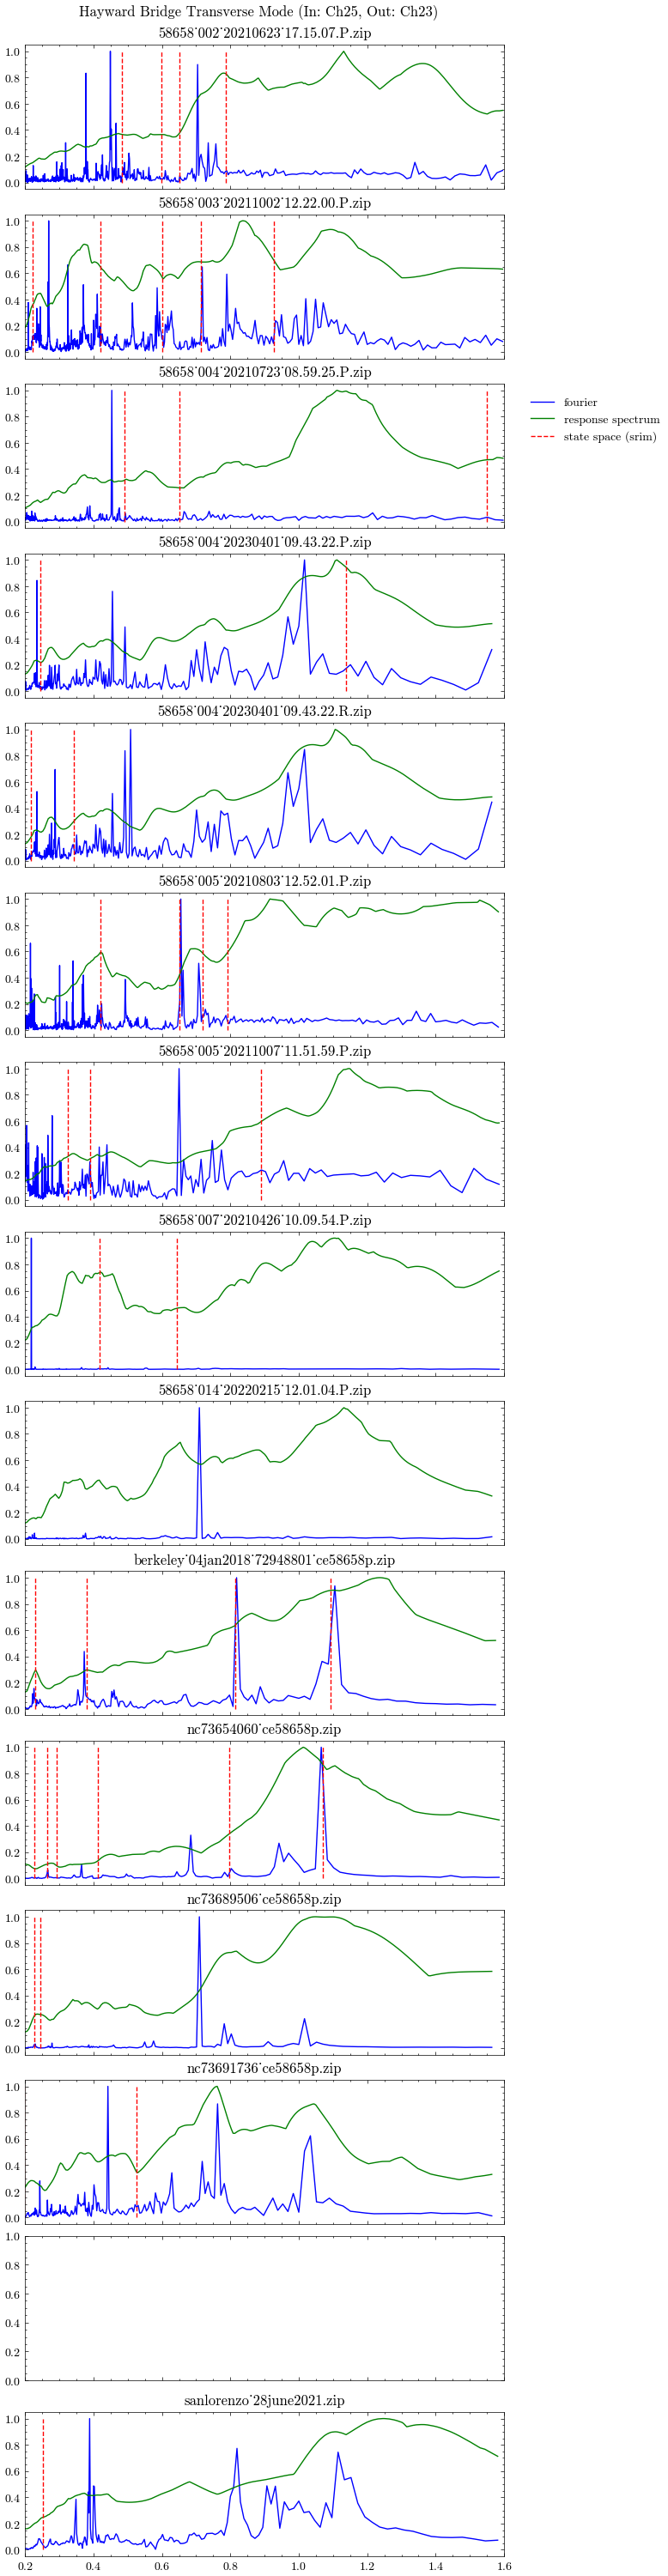

In [5]:
# event_names = ["Berkeley", "San Lorenzo"]
event_modes = []
from matplotlib import pyplot as plt
file_axes = {}

fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
axi = iter(axs)

method = "srim"

for i, file in enumerate(files):
    ax = next(axi) 
    # fig, ax = plt.subplots(figsize=(10,5))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*", "*date*"])
        print("peak acceleration (cm/s/s):", event["peak_accel"])
        inputs, dt = extract_channels(event, data_conf.inputs)
        outpts, dt = extract_channels(event, data_conf.outputs)
        conf.decimation = 8 # decimation factor for state space method
        realization = ssid.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        # raise e
        print(e)
        continue
    ss_modes = modal.system_modes(realization,dt,**conf)
    event_modes.append(list(ss_modes.values()))
    print_modes(ss_modes)
    conf.decimation = 1 # decimation factor for transfer function methods
    periods, amplitudes = spec.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["fourier" if i==0 else None][0], color="blue") #, alpha = (1/(len(files)+2))*(i+1))
    periods, amplitudes = spec.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    ax.plot(periods, amplitudes, label=["response spectrum" if i==0 else None][0], color="green") #, alpha = (1/(len(files)+2))*(i+1))
    ax.vlines([1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5], 0, 1, color='r', linestyles='dashed', label=[f"state space ({method})" if i==0 else None][0])
    ax.set_xlim(conf.period_band)
    ax.set_title(file.name)
fig.legend(bbox_to_anchor=(1.3,0.85))
event_frequencies = mode_statistics(event_modes, "freq")
fig.suptitle(title)